# Continuing with Unit 1

In [1]:
cd("/Users/uqjnazar/git/Julia_ML_training/unit1")

In [2]:
pwd() # this is the current directory

"/Users/uqjnazar/git/Julia_ML_training/unit1"

In [3]:
@__DIR__

"/Users/uqjnazar/git/Julia_ML_training/unit1"

In [4]:
using Pkg
Pkg.activate(@__DIR__)

  Activating project at `~/git/Julia_ML_training/unit1`


In [5]:
Pkg.status()

Status `~/git/Julia_ML_training/unit1/Project.toml`
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.7.0
⌃ [31c24e10] Distributions v0.25.119
  [f6369f11] ForwardDiff v1.0.1
⌃ [7073ff75] IJulia v1.27.0
  [91a5bcdd] Plots v1.40.13
⌃ [c3e4b0f8] Pluto v0.20.8
  [6099a3de] PythonCall v0.9.25
  [1fd47b50] QuadGK v2.11.2
  [6f49c342] RCall v0.14.8
  [f2b01f46] Roots v2.2.7
  [276daf66] SpecialFunctions v2.5.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


# Something we had before lunch was `isa`

In [40]:
Int64 isa Number # Shocked Yoni before the break...

false

In [37]:
?isa

search: isa isnan imag ispath isreal



```
isa(x, type) -> Bool
```

Determine whether `x` is of the given `type`. Can also be used as an infix operator, e.g. `x isa type`.

# Examples

```jldoctest
julia> isa(1, Int)
true

julia> isa(1, Matrix)
false

julia> isa(1, Char)
false

julia> isa(1, Number)
true

julia> 1 isa Number
true
```


In [38]:
isa(1, Int64)

true

In [39]:
1 isa Int64

true

In [41]:
typeof(Int64)

DataType

In [42]:
"hello" isa String

true

In [45]:
'c' isa Char  #Single charcters in Julia are in ' ' (single quotes)

true

In [46]:
"c" isa Char

false

In [47]:
? subtypes

search: subtypes supertypes supertype oftype keytype eltype fieldtypes valtype



```
subtypes(T::DataType)
```

Return a list of immediate subtypes of DataType `T`. Note that all currently loaded subtypes are included, including those not visible in the current module.

See also [`supertype`](@ref), [`supertypes`](@ref), [`methodswith`](@ref).

# Examples

```jldoctest
julia> subtypes(Integer)
3-element Vector{Any}:
 Bool
 Signed
 Unsigned
```


In [48]:
subtypes(Number)

3-element Vector{Any}:
 Base.MultiplicativeInverses.MultiplicativeInverse
 Complex
 Real

In [49]:
subtypes(Real)

4-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 Integer
 Rational

In [50]:
isabstracttype(Integer)

true

In [51]:
# You will never have a variable x that is an "Integer"

In [6]:
function exactly_half(x::Integer)
    return x ÷ 2 #\div ÷ is like the div() function, it is division without remainder (in Python //)
end

exactly_half (generic function with 1 method)

In [7]:
methods(exactly_half)

# 1 method for generic function "exactly_half" from Main:
 [1] exactly_half(x::Integer)
     @ In[6]:1

In [8]:
exactly_half(7.5)

LoadError: MethodError: no method matching exactly_half(::Float64)
The function `exactly_half` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  exactly_half([91m::Integer[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[6]:1[24m[39m


In [9]:
exactly_half(7)

3

In [10]:
7 isa Integer

true

In [11]:
UInt8(7)

0x07

In [12]:
exactly_half(UInt8(7))

0x0000000000000003

In [13]:
typeof(ans) #ans is the last return value

UInt64

## Unit 1 [Section 6](https://open-aims.github.io/Julia_ML_training/unit1/unit_1.html#story-computing-square-roots-multiple-dispatch-types-llvm)

In [14]:
? sqrt

search: sqrt isqrt sort sort! Cshort sprint cbrt struct stat



```
sqrt(x)
```

Return $\sqrt{x}$.

Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments. Use complex negative arguments instead. Note that `sqrt` has a branch cut along the negative real axis.

The prefix operator `√` is equivalent to `sqrt`.

See also: [`hypot`](@ref).

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> sqrt(big(81))
9.0

julia> sqrt(big(-81))
ERROR: DomainError with -81.0:
NaN result for non-NaN input.
Stacktrace:
 [1] sqrt(::BigFloat) at ./mpfr.jl:501
[...]

julia> sqrt(big(complex(-81)))
0.0 + 9.0im

julia> sqrt(-81 - 0.0im)  # -0.0im is below the branch cut
0.0 - 9.0im

julia> .√(1:4)
4-element Vector{Float64}:
 1.0
 1.4142135623730951
 1.7320508075688772
 2.0
```

---

```
sqrt(A::AbstractMatrix)
```

If `A` has no negative real eigenvalues, compute the principal matrix square root of `A`, that is the unique matrix $X$ with eigenvalues having positive real part such that $X^2 = A$. Otherwise, a nonprincipal square root is returned.

If `A` is real-symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the square root.   For such matrices, eigenvalues λ that appear to be slightly negative due to roundoff errors are treated as if they were zero. More precisely, matrices with all eigenvalues `≥ -rtol*(max |λ|)` are treated as semidefinite (yielding a Hermitian square root), with negative eigenvalues taken to be zero. `rtol` is a keyword argument to `sqrt` (in the Hermitian/real-symmetric case only) that defaults to machine precision scaled by `size(A,1)`.

Otherwise, the square root is determined by means of the Björck-Hammarling method [^BH83], which computes the complex Schur form ([`schur`](@ref)) and then the complex square root of the triangular factor. If a real square root exists, then an extension of this method [^H87] that computes the real Schur form and then the real square root of the quasi-triangular factor is instead used.

[^BH83]: Åke Björck and Sven Hammarling, "A Schur method for the square root of a matrix", Linear Algebra and its Applications, 52-53, 1983, 127-140. [doi:10.1016/0024-3795(83)80010-X](https://doi.org/10.1016/0024-3795(83)80010-X)

[^H87]: Nicholas J. Higham, "Computing real square roots of a real matrix", Linear Algebra and its Applications, 88-89, 1987, 405-430. [doi:10.1016/0024-3795(87)90118-2](https://doi.org/10.1016/0024-3795(87)90118-2)

# Examples

```jldoctest
julia> A = [4 0; 0 4]
2×2 Matrix{Int64}:
 4  0
 0  4

julia> sqrt(A)
2×2 Matrix{Float64}:
 2.0  0.0
 0.0  2.0
```


In [15]:
sqrt(6)

2.449489742783178

In [16]:
sqrt(4)

2.0

In [17]:
√6 #\sqrt + [TAB]

2.449489742783178

In [19]:
α = 6;

In [ ]:
println_show(x);

In [ ]:
println_show( √α) #why not?

In [ ]:
"""
It shows both the name of x and it's value, like `x = 17`.
"""
function println_show(x)

end

In [ ]:
y = 20
println_show(y)

In [20]:
@show √α;

√α = 2.449489742783178


In [23]:
@show(√α); #function style invokation

√α = 2.449489742783178


In [24]:
sqrt(-1)

LoadError: DomainError with -1.0:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [25]:
methods(sqrt)

# 19 methods for generic function "sqrt" from Base:
  [1] sqrt(x::BigInt)
     @ Base.MPFR mpfr.jl:703
  [2] sqrt(a::Float16)
     @ Base.Math math.jl:1511
  [3] sqrt(::Missing)
     @ Base.Math math.jl:1533
  [4] sqrt(x::BigFloat)
     @ Base.MPFR mpfr.jl:695
  [5] sqrt(a::ComplexF16)
     @ Base.Math math.jl:1512
  [6] sqrt(D::LinearAlgebra.Diagonal)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/diagonal.jl:802
  [7] sqrt(A::LinearAlgebra.UnitUpperTriangular{T, S} where S<:AbstractMatrix{T}) where T
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2392
  [8] sqrt(J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:173
  [9] sqrt(z::Complex)
     @ complex.jl:530
 [10] sqrt(A::LinearAlgebra.UpperTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2391
 [11] sqrt(x::Union{Float32, Float64})
     @ Base.Math math.jl:607
 [12] sqrt(x::Real)
     @ Base.Math math.jl:1528
 [13] sqrt(A::LinearAlgebra.Transpose{T, <:AbstractMatrix} where T)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:936
 [14] sqrt(A::LinearAlgebra.Adjoint{T, <:AbstractMatrix} where T)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:935
 [15] sqrt(A::LinearAlgebra.UnitLowerTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2411
 [16] sqrt(A::LinearAlgebra.LowerTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2410
 [17] sqrt(A::LinearAlgebra.Hermitian{T, S} where S<:(AbstractMatrix{<:T}); rtol) where T<:Complex
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:823
 [18] sqrt(A::Union{LinearAlgebra.Hermitian{T, S}, LinearAlgebra.Symmetric{T, S}} where S; rtol) where T<:Real
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:812
 [19] sqrt(A::AbstractMatrix{T}) where T<:Union{Real, Complex}
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:905

In [26]:
sqrt("2")

LoadError: MethodError: no method matching sqrt(::String)
The function `sqrt` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  sqrt([91m::BigInt[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmpfr.jl:703[24m[39m
[0m  sqrt([91m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1511[24m[39m
[0m  sqrt([91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1533[24m[39m
[0m  ...


In [31]:
rand(Int)

779962238560129617

In [32]:
rand(UInt8)

0x64

In [34]:
rand(Float64)

0.8734590912889167

In [35]:
rand()

0.9185198567105016

In [29]:
parse(Float64,"2.3")

2.3

In [30]:
parse(Float64,"x2.3")

LoadError: ArgumentError: cannot parse "x2.3" as Float64

In [27]:
?parse

search: parse tryparse pairs Base parent falses



```
parse(type, str; base)
```

Parse a string as a number. For `Integer` types, a base can be specified (the default is 10). For floating-point types, the string is parsed as a decimal floating-point number.  `Complex` types are parsed from decimal strings of the form `"R±Iim"` as a `Complex(R,I)` of the requested type; `"i"` or `"j"` can also be used instead of `"im"`, and `"R"` or `"Iim"` are also permitted. If the string does not contain a valid number, an error is raised.

!!! compat "Julia 1.1"
    `parse(Bool, str)` requires at least Julia 1.1.


# Examples

```jldoctest
julia> parse(Int, "1234")
1234

julia> parse(Int, "1234", base = 5)
194

julia> parse(Int, "afc", base = 16)
2812

julia> parse(Float64, "1.2e-3")
0.0012

julia> parse(Complex{Float64}, "3.2e-1 + 4.5im")
0.32 + 4.5im
```

---

```
parse(::Type{Platform}, triplet::AbstractString)
```

Parses a string platform triplet back into a `Platform` object.

---

```
parse(::Type{SimpleColor}, rgb::String)
```

An analogue of `tryparse(SimpleColor, rgb::String)` (which see), that raises an error instead of returning `nothing`.


In [ ]:
import Base: sqrt #import is "kindof like using"

In [36]:
function Base.sqrt(s::String)
    num_value = parse(Float64, s)
    return √num_value
end

In [37]:
methods(sqrt) |> length

20

In [38]:
methods(sqrt)

# 20 methods for generic function "sqrt" from Base:
  [1] sqrt(x::BigInt)
     @ Base.MPFR mpfr.jl:703
  [2] sqrt(a::Float16)
     @ Base.Math math.jl:1511
  [3] sqrt(::Missing)
     @ Base.Math math.jl:1533
  [4] sqrt(x::BigFloat)
     @ Base.MPFR mpfr.jl:695
  [5] sqrt(a::ComplexF16)
     @ Base.Math math.jl:1512
  [6] sqrt(s::String)
     @ Main In[36]:1
  [7] sqrt(D::LinearAlgebra.Diagonal)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/diagonal.jl:802
  [8] sqrt(A::LinearAlgebra.UnitUpperTriangular{T, S} where S<:AbstractMatrix{T}) where T
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2392
  [9] sqrt(J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:173
 [10] sqrt(z::Complex)
     @ complex.jl:530
 [11] sqrt(A::LinearAlgebra.UpperTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2391
 [12] sqrt(x::Union{Float32, Float64})
     @ Base.Math math.jl:607
 [13] sqrt(x::Real)
     @ Base.Math math.jl:1528
 [14] sqrt(A::LinearAlgebra.Transpose{T, <:AbstractMatrix} where T)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:936
 [15] sqrt(A::LinearAlgebra.Adjoint{T, <:AbstractMatrix} where T)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:935
 [16] sqrt(A::LinearAlgebra.UnitLowerTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2411
 [17] sqrt(A::LinearAlgebra.LowerTriangular)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2410
 [18] sqrt(A::LinearAlgebra.Hermitian{T, S} where S<:(AbstractMatrix{<:T}); rtol) where T<:Complex
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:823
 [19] sqrt(A::Union{LinearAlgebra.Hermitian{T, S}, LinearAlgebra.Symmetric{T, S}} where S; rtol) where T<:Real
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:812
 [20] sqrt(A::AbstractMatrix{T}) where T<:Union{Real, Complex}
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:905

In [39]:
sqrt("3.14")

1.772004514666935

In [45]:
x = 5
"My dog is $(x+2) years old"

"My dog is 7 years old"

In [46]:
sqrt("$(Float64(π))") #Anti-societal

1.7724538509055159

In [47]:
sqrt(-1)

LoadError: DomainError with -1.0:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [48]:
Complex(-1)

-1 + 0im

In [49]:
typeof(ans)

Complex{Int64}

In [50]:
sqrt(Complex(-1))

0.0 + 1.0im

In [53]:
num = im^2

-1 + 0im

In [55]:
real(num)

-1

In [56]:
imag(num)

0

In [57]:
@which sqrt(-1)

sqrt(x::Real)
     @ Base.Math math.jl:1528

In [58]:
@which sqrt(-1 + 0im)

sqrt(z::Complex)
     @ Base complex.jl:530

In [59]:
data = [√i for i in 1:10]

10-element Vector{Float64}:
 1.0
 1.4142135623730951
 1.7320508075688772
 2.0
 2.23606797749979
 2.449489742783178
 2.6457513110645907
 2.8284271247461903
 3.0
 3.1622776601683795

## Exercise.... let's find the perfect squares between 0 and 100

In [79]:
data = [(i,√i) for i in 1:100]

100-element Vector{Tuple{Int64, Float64}}:
 (1, 1.0)
 (2, 1.4142135623730951)
 (3, 1.7320508075688772)
 (4, 2.0)
 (5, 2.23606797749979)
 (6, 2.449489742783178)
 (7, 2.6457513110645907)
 (8, 2.8284271247461903)
 (9, 3.0)
 (10, 3.1622776601683795)
 (11, 3.3166247903554)
 (12, 3.4641016151377544)
 (13, 3.605551275463989)
 ⋮
 (89, 9.433981132056603)
 (90, 9.486832980505138)
 (91, 9.539392014169456)
 (92, 9.591663046625438)
 (93, 9.643650760992955)
 (94, 9.695359714832659)
 (95, 9.746794344808963)
 (96, 9.797958971132712)
 (97, 9.848857801796104)
 (98, 9.899494936611665)
 (99, 9.9498743710662)
 (100, 10.0)

In [65]:
data[55]

(55, 7.416198487095663)

In [66]:
typeof(data)

Vector{Tuple{Int64, Float64}} (alias for Array{Tuple{Int64, Float64}, 1})

In [67]:
data[55][2]

7.416198487095663

In [68]:
# How do I know that 7.0 is a "whole number"?

In [69]:
floor(7.4)

7.0

In [70]:
floor(7.4) == 7.4

false

In [71]:
floor(7.0) == 7.0

true

#### Kevin's starting point

In [73]:
vec = [] # empty array

Any[]

In [75]:
for i in 1:5
    vec[i] = i^2 #throws an out of bounds
end

LoadError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

In [78]:
vec = []
for i in 1:5
    push!(vec, i^2) # appends/pushes to the end of the vector
end
vec

5-element Vector{Any}:
  1
  4
  9
 16
 25

In [85]:
perfect_squares = [] #will put values of perfect squares
for x in data
    if floor(x[2]) == x[2]  #if it is a perfect square
        push!(perfect_squares, x[1])
    end
end
perfect_squares

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

#####  Pedro's attempt

The broadcast operator "."

In [87]:
f(x) = x + 3

f (generic function with 1 method)

In [89]:
my_array = [10,20,30];

In [91]:
map(f, my_array)

3-element Vector{Int64}:
 13
 23
 33

In [92]:
f.(my_array) #broadcast operator

3-element Vector{Int64}:
 13
 23
 33

In [93]:
100*my_array

3-element Vector{Int64}:
 1000
 2000
 3000

In [94]:
my_array + 100

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
The function `+` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:596[24m[39m
[0m  +([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  +([91m::Complex{Bool}[39m, ::Real)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:323[24m[39m
[0m  ...


In [96]:
my_array .+ 100 #broadcasting the + function

3-element Vector{Int64}:
 110
 120
 130

In [97]:
my_array^2

LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)
The function `^` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  ^([91m::Regex[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mregex.jl:901[24m[39m
[0m  ^([91m::Float64[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1197[24m[39m
[0m  ^([91m::Missing[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:155[24m[39m
[0m  ...


In [98]:
my_array.^2

3-element Vector{Int64}:
 100
 400
 900

In [90]:
f(my_array)

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
The function `+` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:596[24m[39m
[0m  +([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  +([91m::Complex{Bool}[39m, ::Real)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:323[24m[39m
[0m  ...


### A solution:

In [101]:
sqrt(1:100)

LoadError: MethodError: no method matching sqrt(::UnitRange{Int64})
The function `sqrt` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  sqrt([91m::BigInt[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmpfr.jl:703[24m[39m
[0m  sqrt([91m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1511[24m[39m
[0m  sqrt([91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1533[24m[39m
[0m  ...


In [100]:
typeof(1:100)

UnitRange{Int64}

In [99]:
sqrt.(1:100)  # like [sqrt(i) for in 1:100]

100-element Vector{Float64}:
  1.0
  1.4142135623730951
  1.7320508075688772
  2.0
  2.23606797749979
  2.449489742783178
  2.6457513110645907
  2.8284271247461903
  3.0
  3.1622776601683795
  3.3166247903554
  3.4641016151377544
  3.605551275463989
  ⋮
  9.433981132056603
  9.486832980505138
  9.539392014169456
  9.591663046625438
  9.643650760992955
  9.695359714832659
  9.746794344808963
  9.797958971132712
  9.848857801796104
  9.899494936611665
  9.9498743710662
 10.0

In [103]:
[2.0, 3.0] === [2, 3]

false

In [102]:
[2.0, 3.0] == [2, 3]

true

In [104]:
[2.0, 3.0] == [2.0, 3.1]

false

In [109]:
big_bit_vec = (rand(1:3, 10^7) .== rand(1:3, 10^7))

10000000-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 1
 1
 0
 0
 0
 1
 0

In [112]:
log10(sizeof(big_bit_vec)*8)

7.0

In [120]:
bit_ans = [2.0, 3.0, 4.0] .== [2.0, 3.1, 4.0]

3-element BitVector:
 1
 0
 1

In [113]:
my_array

3-element Vector{Int64}:
 10
 20
 30

In [121]:
my_array[bit_ans]

2-element Vector{Int64}:
 10
 30

In [122]:
sqrt.(1:100) .== floor.(sqrt.(1:100))

100-element BitVector:
 1
 0
 0
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

In [124]:
(1:100)[sqrt.(1:100) .== floor.(sqrt.(1:100))]
 

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [125]:
sizeof(Int64)

8

In [127]:
sizeof(53535)

8

In [128]:
?isbits

search: isbits isbitstype isqrt isless isfile digits isdir isfifo isinf ispath



```
isbits(x)
```

Return `true` if `x` is an instance of an [`isbitstype`](@ref) type.


In [131]:
(1:100) #putting brackets around it

1:100

In [130]:
1:100

1:100

In [133]:
(1:100)[97]

97

In [134]:
@code_llvm sqrt(2.5)

; Function Signature: sqrt(Float64)
;  @ math.jl:607 within `sqrt`
define double @julia_sqrt_19724(double %"x::Float64") #0 {
top:
;  @ math.jl:608 within `sqrt`
; ┌ @ float.jl:618 within `<`
   %0 = fcmp uge double %"x::Float64", 0.000000e+00
; └
  br i1 %0, label %L5, label %L3

L3:                                               ; preds = %top
  call void @j_throw_complex_domainerror_19729(ptr nonnull @"jl_sym#sqrt#19730.jit", double %"x::Float64") #10
  unreachable

L5:                                               ; preds = %top
;  @ math.jl:609 within `sqrt`
  %1 = call double @llvm.sqrt.f64(double %"x::Float64")
  ret double %1
}


In [136]:
function my_alg(n::Int64)
    s = 0
    for i in 1:n
        s+=i
    end
    return s
end

my_alg (generic function with 2 methods)

In [137]:
my_alg(3)

6

In [138]:
@code_llvm my_alg(3)

; Function Signature: my_alg(Int64)
;  @ In[136]:1 within `my_alg`
define i64 @julia_my_alg_19835(i64 signext %"n::Int64") #0 {
top:
;  @ In[136]:3 within `my_alg`
; ┌ @ range.jl:904 within `iterate`
; │┌ @ range.jl:681 within `isempty`
; ││┌ @ operators.jl:379 within `>`
; │││┌ @ int.jl:83 within `<`
      %0 = icmp slt i64 %"n::Int64", 1
; └└└└
  br i1 %0, label %L32, label %L17.preheader

L17.preheader:                                    ; preds = %top
;  @ In[136]:5 within `my_alg`
  %1 = shl nuw i64 %"n::Int64", 1
  %2 = add nsw i64 %"n::Int64", -1
  %3 = zext i64 %2 to i65
  %4 = add nsw i64 %"n::Int64", -2
  %5 = zext i64 %4 to i65
  %6 = mul i65 %3, %5
  %7 = lshr i65 %6, 1
  %8 = trunc i65 %7 to i64
  %9 = add i64 %1, %8
  %10 = add i64 %9, -1
;  @ In[136]:6 within `my_alg`
  br label %L32

L32:                                              ; preds = %L17.preheader, %top
  %value_phi11 = phi i64 [ 0, %top ], [ %10, %L17.preheader ]
  ret i64 %value_phi11
}


In [147]:
x = 25.1
my_func1(x) = x ≤ 25 ? println("small") : println("big")  # ? :  "trinary operator"

my_func1 (generic function with 1 method)

In [148]:
my_func1(x)

big


In [152]:
function my_func2(x)
    if x <= 25
        println("small")
    else
        println("big")
    end
end

my_func2 (generic function with 1 method)

In [153]:
@code_lowered my_func1(x)

CodeInfo(
1 ─ %1 = x ≤ 25
└──      goto #3 if not %1
2 ─ %3 = Main.println("small")
└──      return %3
3 ─ %5 = Main.println("big")
└──      return %5
)

In [154]:
@code_lowered my_func2(x)

CodeInfo(
1 ─ %1 = x <= 25
└──      goto #3 if not %1
2 ─ %3 = Main.println("small")
└──      return %3
3 ─ %5 = Main.println("big")
└──      return %5
)

In [155]:
@code_native sqrt(2.5)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 12, 0
	.globl	_julia_sqrt_21905               ; -- Begin function julia_sqrt_21905
	.p2align	2
_julia_sqrt_21905:                      ; @julia_sqrt_21905
; Function Signature: sqrt(Float64)
; ┌ @ math.jl:607 within `sqrt`
; %bb.0:                                ; %top
; │ @ math.jl within `sqrt`
	;DEBUG_VALUE: sqrt:x <- $d0
	;DEBUG_VALUE: sqrt:x <- $d0
; │ @ math.jl:608 within `sqrt`
	fcmp	d0, #0.0
	b.mi	LBB0_2
; %bb.1:                                ; %L5
; │ @ math.jl:609 within `sqrt`
	fsqrt	d0, d0
	ret
LBB0_2:                                 ; %L3
	stp	x29, x30, [sp, #-16]!           ; 16-byte Folded Spill
; │ @ math.jl:608 within `sqrt`
Lloh0:
	adrp	x0, "l_jl_sym#sqrt#21911.jit"@PAGE
Lloh1:
	add	x0, x0, "l_jl_sym#sqrt#21911.jit"@PAGEOFF
	bl	_j_throw_complex_domainerror_21910
	.loh AdrpAdd	Lloh0, Lloh1
; └
                                        ; -- End function
	.section	__DATA,__const
	.p2align	3, 0x0     

#### Function arguments

In [156]:
function f()
    println("hello")
end

f (generic function with 2 methods)

In [157]:
f()

hello


In [158]:
function f(x)
    println("hello $x")
end

f (generic function with 2 methods)

In [159]:
f(2.3)

hello 2.3


In [160]:
function f(x::Float64)
    println("hello float $x")
end

f (generic function with 3 methods)

In [161]:
f(2.3)

hello float 2.3


In [162]:
f(2)

hello 2


In [165]:
z = 7
10z

70

In [166]:
function f(x1::Real, x2::Real)
    return x1 + 10x2 #just summing up
end

f (generic function with 4 methods)

In [167]:
f(2.3, 10)

102.3

In [168]:
f(10, 2.3)

33.0

; is the "break" between positional and keyword arguments

In [177]:
function f(x1::Real, x2::Real = 10000 ; verbose = false, repeat = 1)
    ret_val = x1 + 10x2 #just summing up
    if verbose
        for _ in 1:repeat
            println(ret_val)
        end
    end
    return ret_val
end

f (generic function with 5 methods)

In [172]:
f(2.3, 10)

102.3

In [174]:
f(2.3, 10, verbose = true)

102.3


102.3

In [175]:
f(2.3, 10; verbose = true)

102.3


102.3

In [176]:
f(2.3, 10; verbose = true, repeat = 5)

102.3
102.3
102.3
102.3
102.3


102.3

In [178]:
methods(f)

# 5 methods for generic function "f" from Main:
 [1] f(x::Float64)
     @ In[160]:1
 [2] f(x1::Real, x2::Real; verbose, repeat)
     @ In[177]:1
 [3] f(x1::Real; ...)
     @ In[177]:1
 [4] f()
     @ In[156]:1
 [5] f(x)
     @ In[158]:1

In [184]:
function f(x1::Real, x2::Real = 10000 ; operator_type, repeat = 1, verbose = false)
    ret_val = operator_type(x1, 10x2) #just summing up
    if verbose
        for _ in 1:repeat
            println(ret_val)
        end
    end
    return ret_val
end

f (generic function with 5 methods)

In [186]:
f(10, 20)

LoadError: UndefKeywordError: keyword argument `operator_type` not assigned

In [185]:
f(10, 20; operator_type=+)

210

In [187]:
f(10, 20; operator_type=*)

2000

In [188]:
identity(3535)

3535

In [191]:
operator_type = + 
@show f(10, 20; operator_type) #same as below
@show f(10, 20; operator_type = operator_type)

f(10, 20; operator_type) = 210
f(10, 20; operator_type = operator_type) = 210


210

In [192]:
struct MyData
    x::Int
    y::String
end

In [194]:
x = 3
while true
    @show x
    if x > 10
        break
    end
    x +=1
end

x = 3
x = 4
x = 5
x = 6
x = 7
x = 8
x = 9
x = 10
x = 11


In [195]:
true && true

true

In [197]:
false && true #logical and

false

In [203]:
function bab_sqrt(z ; init_x = z/2, verbose = false, tol = 1e-10)
    x = init_x
    z < 0 && error("hey dude we only do real numbers")
    # if z<0
    #   error("hey dude we only do real numbers")
    # end
    while true
        verbose && println("Babylonian iterate: $x") # "ugly" but "neat" Julia idiom using Lazy evluation
        next_x = 0.5*(x + z / x)
        abs(next_x - x) < tol && break
        x = next_x
    end
    x
end

bs, s = bab_sqrt(5000;verbose = true), sqrt(5000)
println("Babylonian:\t$bs\nSystem:\t\t$s")

Babylonian iterate: 2500.0
Babylonian iterate: 1251.0
Babylonian iterate: 627.4984012789769
Babylonian iterate: 317.7332745349828
Babylonian iterate: 166.7348720428981
Babylonian iterate: 98.36130004862623
Babylonian iterate: 74.59715020033856
Babylonian iterate: 70.81191968888325
Babylonian iterate: 70.71075049245557
Babylonian iterate: 70.71067811869179
Babylonian:	70.71067811869179
System:		70.71067811865476


In [204]:
bs ≈ s # \approx + [TAB]

true

In [206]:
bs == s

false

In [207]:
bs - s

3.703348738781642e-11

In [208]:
eps()

2.220446049250313e-16

In [209]:
bs, s = bab_sqrt(5000;verbose = true, tol = eps()), sqrt(5000)

Babylonian iterate: 2500.0
Babylonian iterate: 1251.0
Babylonian iterate: 627.4984012789769
Babylonian iterate: 317.7332745349828
Babylonian iterate: 166.7348720428981
Babylonian iterate: 98.36130004862623
Babylonian iterate: 74.59715020033856
Babylonian iterate: 70.81191968888325
Babylonian iterate: 70.71075049245557
Babylonian iterate: 70.71067811869179
Babylonian iterate: 70.71067811865476


(70.71067811865476, 70.71067811865476)

In [211]:
bs - s, bs==s

(0.0, true)

In [205]:
?isapprox

search: isapprox iszero isperm



```
isapprox(x, y; atol::Real=0, rtol::Real=atol>0 ? 0 : √eps, nans::Bool=false[, norm::Function])
```

Inexact equality comparison. Two numbers compare equal if their relative distance *or* their absolute distance is within tolerance bounds: `isapprox` returns `true` if `norm(x-y) <= max(atol, rtol*max(norm(x), norm(y)))`. The default `atol` (absolute tolerance) is zero and the default `rtol` (relative tolerance) depends on the types of `x` and `y`. The keyword argument `nans` determines whether or not NaN values are considered equal (defaults to false).

For real or complex floating-point values, if an `atol > 0` is not specified, `rtol` defaults to the square root of [`eps`](@ref) of the type of `x` or `y`, whichever is bigger (least precise). This corresponds to requiring equality of about half of the significant digits. Otherwise, e.g. for integer arguments or if an `atol > 0` is supplied, `rtol` defaults to zero.

The `norm` keyword defaults to `abs` for numeric `(x,y)` and to `LinearAlgebra.norm` for arrays (where an alternative `norm` choice is sometimes useful). When `x` and `y` are arrays, if `norm(x-y)` is not finite (i.e. `±Inf` or `NaN`), the comparison falls back to checking whether all elements of `x` and `y` are approximately equal component-wise.

The binary operator `≈` is equivalent to `isapprox` with the default arguments, and `x ≉ y` is equivalent to `!isapprox(x,y)`.

Note that `x ≈ 0` (i.e., comparing to zero with the default tolerances) is equivalent to `x == 0` since the default `atol` is `0`.  In such cases, you should either supply an appropriate `atol` (or use `norm(x) ≤ atol`) or rearrange your code (e.g. use `x ≈ y` rather than `x - y ≈ 0`).   It is not possible to pick a nonzero `atol` automatically because it depends on the overall scaling (the "units") of your problem: for example, in `x - y ≈ 0`, `atol=1e-9` is an absurdly small tolerance if `x` is the [radius of the Earth](https://en.wikipedia.org/wiki/Earth_radius) in meters, but an absurdly large tolerance if `x` is the [radius of a Hydrogen atom](https://en.wikipedia.org/wiki/Bohr_radius) in meters.

!!! compat "Julia 1.6"
    Passing the `norm` keyword argument when comparing numeric (non-array) arguments requires Julia 1.6 or later.


# Examples

```jldoctest
julia> isapprox(0.1, 0.15; atol=0.05)
true

julia> isapprox(0.1, 0.15; rtol=0.34)
true

julia> isapprox(0.1, 0.15; rtol=0.33)
false

julia> 0.1 + 1e-10 ≈ 0.1
true

julia> 1e-10 ≈ 0
false

julia> isapprox(1e-10, 0, atol=1e-8)
true

julia> isapprox([10.0^9, 1.0], [10.0^9, 2.0]) # using `norm`
true
```

---

```
isapprox(x; kwargs...) / ≈(x; kwargs...)
```

Create a function that compares its argument to `x` using `≈`, i.e. a function equivalent to `y -> y ≈ x`.

The keyword arguments supported here are the same as those in the 2-argument `isapprox`.

!!! compat "Julia 1.5"
    This method requires Julia 1.5 or later.



In [199]:
x, y = sqrt(10), exp(10)

(3.1622776601683795, 22026.465794806718)

In [200]:
x

3.1622776601683795

In [201]:
y

22026.465794806718

In [202]:
x = 10
y = 20
x, y = y, x #switch x and y
@show x
@show y;

x = 20
y = 10


#### Newton's method

In [212]:
@info "some info about the computation you did"

[ Info: some info about the computation you did


In [214]:
"""
Newton's method
* First arg is function to find a root of.
* Second arg is initial guess.
* Third arg is the deriviative function.
"""
function newton(f, x_0::Real, der_f; ε = 10e-5, maxiter = 100) #\varepsilon
    x = x_0
    x_prev = x + 2ε
    iter = 0
    while abs(x-x_prev) ≥ ε #\ge
        x_prev = x
        x = x - f(x)/der_f(x)
        iter += 1
        if iter == maxiter 
            @info "Maximal number of iterations reached"
            break
        end
    end
    return x
end

my_root2 = newton((x)->(x^2 - 2), 3, (x)->2x)
@show my_root2
@show √2
√2 ≈ my_root2  #\approx

my_root2 = 1.4142135623731118
√2 = 1.4142135623730951


true

In [226]:
f(x) = sqrt(log(sin(exp(cos((x/5)^2)*log(x/5)+x^7))) + 1)-1/2

f (generic function with 5 methods)

In [227]:
methods(f)

# 5 methods for generic function "f" from Main:
 [1] f(x::Float64)
     @ In[160]:1
 [2] f(x1::Real, x2::Real; operator_type, repeat, verbose)
     @ In[184]:1
 [3] f(x1::Real; ...)
     @ In[184]:1
 [4] f()
     @ In[156]:1
 [5] f(x)
     @ In[226]:1

In [217]:
using Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (2), wrong source (2))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4))


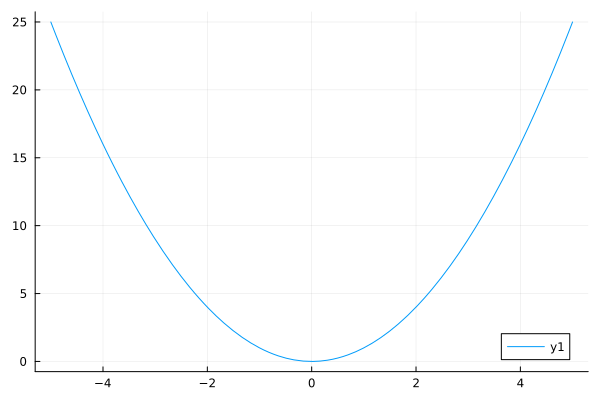

In [224]:
plot((x)->x^2)

In [225]:
f(24)

LoadError: UndefKeywordError: keyword argument `operator_type` not assigned

In [229]:
g(x) = sqrt(log(sin(exp(cos((x/5)^2)*log(x/5)+x^7))) + 1)-1/2

g (generic function with 1 method)

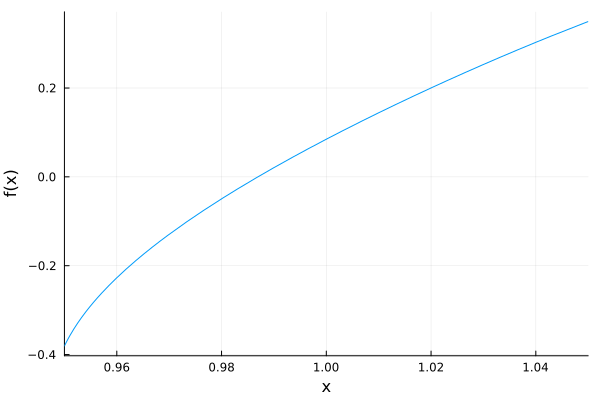

In [232]:
plot(g, xlim=(0.95,1.05), 
      xlabel = "x", 
      ylabel="f(x)", 
      label=false)

See Section 4.4 of https://deeplearningmath.org/ for AutoDiff

In [233]:
using ForwardDiff: derivative

[ Info: Precompiling SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b] (cache misses: wrong dep version loaded (6))


In [234]:
? derivative

search: code_native @code_native



```
ForwardDiff.derivative(f, x::Real)
```

Return `df/dx` evaluated at `x`, assuming `f` is called as `f(x)`.

This method assumes that `isa(f(x), Union{Real,AbstractArray})`.

---

```
ForwardDiff.derivative(f!, y::AbstractArray, x::Real, cfg::DerivativeConfig = DerivativeConfig(f!, y, x), check=Val{true}())
```

Return `df!/dx` evaluated at `x`, assuming `f!` is called as `f!(y, x)` where the result is stored in `y`.

Set `check` to `Val{false}()` to disable tag checking. This can lead to perturbation confusion, so should be used with care.


$$
h(x) = x^2 + x
$$

$$
h'(x) = 2x + 1
$$

In [236]:
h(x) = x^2 + x

h (generic function with 1 method)

In [237]:
h(3)

12

In [238]:
derivative(h, 3)

7

In [243]:
g(x) = sqrt(log(sin(exp(cos((x/5)^2)*log(x/5)+x^7))) + 1)-1/2

g (generic function with 1 method)

In [250]:
using ForwardDiff: derivative
auto_der = derivative(g, 0.95)

δ_val = 0.000001
numer_der = (g(0.95+δ_val) - g(0.95-δ_val))/(2δ_val)
auto_der, numer_der

(24.744628268450505, 24.74462879131778)

**Kernal restarted here because 'f' is polluting things**

In [1]:
using ForwardDiff: derivative

In [3]:
using Plots

In [7]:
f(x) = sqrt(log(sin(exp(cos((x/5)^2)*log(x/5)+x^7))) + 1)-1/2;

Found root: 0.9869317059681162


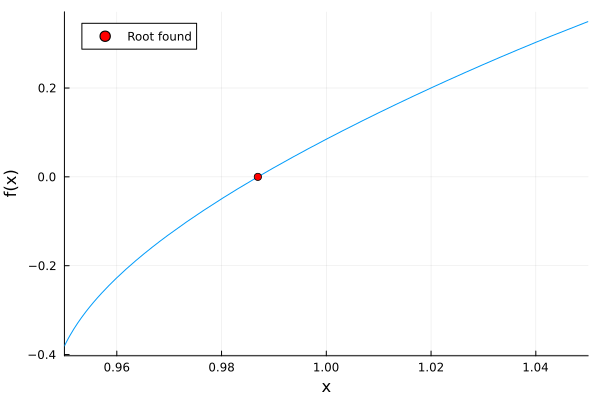

In [8]:
function newton(f, 
                x_0::Real, 
                der_f  = (x)->derivative(f, x) #positional argument with default value that depends on the first argument
                ; 
                ε = 10e-8, 
                maxiter = 100)
    x = x_0
    x_prev = x + 2ε
    iter = 0
    while abs(x-x_prev) ≥ ε
        x_prev = x
        x = x - f(x)/der_f(x)
        iter += 1
        if iter == maxiter 
            @info "Maximal number of iterations reached"
            break
        end
    end
    return x
end

root_point = newton(f,0.95)
println("Found root: $root_point")
plot(f,xlim=(0.95,1.05), xlabel = "x", ylabel="f(x)", label=false)
scatter!([root_point], [0], color=:red, marker=:circle, label="Root found")

##### Exercise (not too hard), add a horizonal black thick line for the x-axis 

#### Continuing with 6.2

In [9]:
Float32

Float32

In [10]:
methods(Float32)

# 93 methods for type constructor:
  [1] Float32(::Irrational{:mad_constant})
     @ StatsBase irrationals.jl:252
  [2] Float32(::Irrational{:SQRT_HALF})
     @ Random irrationals.jl:252
  [3] Float32(::Irrational{:catalan})
     @ Base.MathConstants irrationals.jl:252
  [4] Float32(::Irrational{:φ})
     @ Base.MathConstants irrationals.jl:252
  [5] Float32(::Irrational{:γ})
     @ Base.MathConstants irrationals.jl:252
  [6] Float32(::Irrational{:ℯ})
     @ Base.MathConstants irrationals.jl:252
  [7] Float32(::Irrational{:π})
     @ Base.MathConstants irrationals.jl:252
  [8] Float32(::IrrationalConstants.Sqrtπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
  [9] Float32(x::UInt8)
     @ Base float.jl:245
 [10] Float32(::IrrationalConstants.Twoπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [11] Float32(::IrrationalConstants.Quartπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [12] Float32(::IrrationalConstants.Inv2π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [13] Float32(::IrrationalConstants.Invsqrt2)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [14] Float32(::IrrationalConstants.Log2π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [15] Float32(::IrrationalConstants.Log4π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [16] Float32(::IrrationalConstants.Invπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [17] Float32(x::Float64)
     @ Base float.jl:338
 [18] Float32(x::UInt32)
     @ Base float.jl:245
 [19] Float32(x::Float16)
     @ Base float.jl:340
 [20] Float32(::IrrationalConstants.Sqrt3)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [21] Float32(::IrrationalConstants.Logten)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [22] Float32(::IrrationalConstants.Fourπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [23] Float32(::IrrationalConstants.Logπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [24] Float32(::IrrationalConstants.Sqrthalfπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [25] Float32(x::Int64)
     @ Base float.jl:239
 [26] Float32(x::Int16)
     @ Base float.jl:239
 [27] Float32(::IrrationalConstants.Sqrt2)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [28] Float32(x::UInt16)
     @ Base float.jl:245
 [29] Float32(::IrrationalConstants.Inv4π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [30] Float32(x::Int8)
     @ Base float.jl:239
 [31] Float32(::IrrationalConstants.Invsqrtπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [32] Float32(::IrrationalConstants.Invsqrt2π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [33] Float32(::IrrationalConstants.Halfπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [34] Float32(::IrrationalConstants.Logtwo)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [35] Float32(::IrrationalConstants.Loghalf)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [36] Float32(x::Bool)
     @ Base float.jl:245
 [37] Float32(x::Int128)
     @ Base float.jl:316
 [38] Float32(x::Int32)
     @ Base float.jl:239
 [39] Float32(::IrrationalConstants.Twoinvπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:132
 [40] Float32(::IrrationalConstants.Sqrt2π)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/

In [11]:
@which Float32(2.5)

Float32(x::Float64)
     @ Base float.jl:338

In [12]:
@which Float32(2)

Float32(x::Int64)
     @ Base float.jl:239

In [13]:
a = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [14]:
5*a

3-element Vector{Int64}:
  5
 10
 15

In [15]:
a - 5

LoadError: MethodError: no method matching -(::Vector{Int64}, ::Int64)
For element-wise subtraction, use broadcasting with dot syntax: array .- scalar
The function `-` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  -([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  -([91m::Complex{Bool}[39m, ::Real)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:329[24m[39m
[0m  -([91m::Base.CoreLogging.LogLevel[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90mlogging/[39m[90m[4mlogging.jl:133[24m[39m
[0m  ...


In [16]:
a .- 5

3-element Vector{Int64}:
 -4
 -3
 -2

In [17]:
a / 5

3-element Vector{Float64}:
 0.2
 0.4
 0.6

In [18]:
(1/5)*a

3-element Vector{Float64}:
 0.2
 0.4
 0.6000000000000001

In [19]:
a*(1/5)

3-element Vector{Float64}:
 0.2
 0.4
 0.6000000000000001

## Factorials section

In [20]:
f(x,y) = x+y

f (generic function with 2 methods)

In [21]:
f([2,3])

LoadError: MethodError: no method matching ^(::Vector{Float64}, ::Int64)
The function `^` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  ^([91m::Regex[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mregex.jl:901[24m[39m
[0m  ^([91m::Float64[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1197[24m[39m
[0m  ^([91m::Missing[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:155[24m[39m
[0m  ...


In [22]:
f([2,3]...) #... is "splat operator"

5

In [23]:
methods(*)

# 321 methods for generic function "*" from Base:
   [1] *(r::Regex)
     @ regex.jl:849
   [2] *(x::Bool, z::Complex{Bool})
     @ complex.jl:312
   [3] *(x::Bool, y::Bool)
     @ bool.jl:168
   [4] *(x::Bool, d::ForwardDiff.Dual)
     @ ForwardDiff ~/.julia/packages/ForwardDiff/Wq9Wb/src/dual.jl:531
   [5] *(x::Bool, y::AbstractIrrational)
     @ irrationals.jl:181
   [6] *(x::Bool, z::Complex)
     @ complex.jl:319
   [7] *(x::Real, z::Complex{Bool})
     @ complex.jl:330
   [8] *(x::Bool, y::T) where T<:AbstractFloat
     @ bool.jl:179
   [9] *(x::Rational{BigInt}, y::Rational{BigInt})
     @ Base.GMP.MPQ gmp.jl:1056
  [10] *(::Missing, ::Missing)
     @ missing.jl:122
  [11] *(::Missing)
     @ missing.jl:101
  [12] *(d::Missing, x::Union{AbstractChar, AbstractString})
     @ missing.jl:174
  [13] *(::Missing, ::Number)
     @ missing.jl:123
  [14] *(m1::Measures.AbsoluteLength, m2::Measures.Length{:pct})
     @ Plots.PlotMeasures ~/.julia/packages/Plots/MR7sb/src/plotmeasures.jl:16
  [15] *(z::Complex{Bool}, x::Bool)
     @ complex.jl:313
  [16] *(z::Complex{Bool}, x::Real)
     @ complex.jl:331
  [17] *(z::Complex, x::Bool)
     @ complex.jl:320
  [18] *(c::BigInt, x::BigFloat)
     @ Base.MPFR mpfr.jl:527
  [19] *(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt)
     @ Base.GMP gmp.jl:538
  [20] *(a::BigInt, b::BigInt, c::BigInt, d::BigInt)
     @ Base.GMP gmp.jl:537
  [21] *(a::BigInt, b::BigInt, c::BigInt)
     @ Base.GMP gmp.jl:536
  [22] *(x::BigInt, y::BigInt)
     @ Base.GMP gmp.jl:496
  [23] *(x::BigInt, c::Union{Int16, Int32, Int64, Int8})
     @ Base.GMP gmp.jl:557
  [24] *(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8})
     @ Base.GMP gmp.jl:555
  [25] *(x::BigFloat, c::BigInt)
     @ Base.MPFR mpfr.jl:522
  [26] *(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat)
     @ Base.MPFR mpfr.jl:678
  [27] *(x::BigFloat, y::BigFloat)
     @ Base.MPFR mpfr.jl:491
  [28] *(a::BigFloat, b::BigFloat, c::BigFloat)
     @ Base.MPFR mpfr.jl:665
  [29] *(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat)
     @ Base.MPFR mpfr.jl:671
  [30] *(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8})
     @ Base.MPFR mpfr.jl:498
  [31] *(x::BigFloat, c::Union{Int16, Int32, Int64, Int8})
     @ Base.MPFR mpfr.jl:506
  [32] *(x::BigFloat, c::Union{Float16, Float32, Float64})
     @ Base.MPFR mpfr.jl:514
  [33] *(B::BitMatrix, J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:258
  [34] *(::Number, ::Missing)
     @ missing.jl:124
  [35] *(α::Number, β::Number, C::AbstractMatrix, D::AbstractMatrix)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/matmul.jl:1181
  [36] *(α::Number, β::Number, C::AbstractMatrix, x::AbstractVector)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/matmul.jl:1180
  [37] *(x::Rational, y::Rational)
     @ rational.jl:393
  [38] *(x::AbstractIrrational, y::AbstractIrrational)
     @ irrationals.jl:179
  [39] *(c::Union{Int16, Int32, Int64, Int8}, x::BigInt)
     @ Base.GMP gmp.jl:558
  [40] *(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt)
     @ Base.GMP gmp.jl:556
  [41] *(x::T, y::T) where T<:Union{Int128, UInt128}
     @ int.jl:998
  [42] *(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
     @ int.jl:88
  [43] *(a::Integer, b::Integer)
     @ int.jl:1009
  [44] *(z::Complex, w::Complex)
     @ complex.jl:299
  [45] *(x::FixedPointNumbers.Fixed{T, f}, y::FixedPointNumbers.Fixed{T, f}) where {T, f}
     @ FixedPointNumbers ~/.julia/packages/FixedPointNumbers/Dn4hv/src/fixed.jl:100
  [46] *(x::T, y::T) where T<:FixedPointNumbers.Normed
     @ FixedPointNumbers ~/.julia/packages/FixedPointNumbers/Dn4hv/src/normed.jl:252
  [47] *(x::Rational, y::ForwardDiff.Dual{Ty}) 